In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [12]:
data = pd.read_csv("vectorized_9000.csv", index_col=0)

In [24]:
wc = data["total wc"][0]

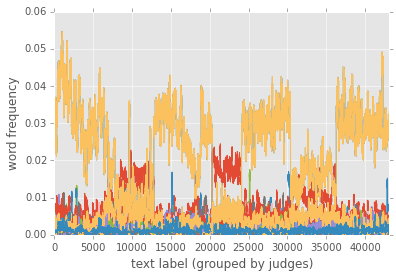

In [13]:
(data.iloc[:,3:]/wc).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [14]:
train_x = np.array(data.iloc[:,3:])
train_x = np.nan_to_num(train_x)
train_x = train_x/wc
train_y = np.array(data.iloc[:,0])

In [15]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import zero_one_loss

In [16]:
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [19]:
result = []
parameter = (3,10,30,50,100,200,300)
for a in parameter:
    round = []
    for file_n_train, file_n_val in ShuffleSplit(data.file_n.unique().shape[0], n_iter=5, test_size=0.2):
        idx_train = data.file_n.isin(file_n_train).as_matrix()
        idx_val = data.file_n.isin(file_n_val).as_matrix()
        clf = RandomForestClassifier(n_estimators=a, n_jobs=4, criterion = "gini")
        #clf = GaussianNB()
        #clf = MultinomialNB(alpha=a)
        clf.fit(train_x[idx_train], train_y[idx_train])
        g = clf.predict(train_x[idx_val])
        e_val = zero_one_loss(g, train_y[idx_val])
        round.append(e_val)
        print e_val
    result.append(round)
DFresult = pd.DataFrame(result)

0.398505747126
0.498275862069
0.441954022989
0.373563218391
0.421264367816
0.350689655172
0.300344827586
0.305402298851
0.272413793103
0.289885057471
0.273908045977
0.226781609195
0.248505747126
0.323563218391
0.256781609195
0.325747126437
0.313908045977
0.276206896552
0.231149425287
0.212873563218
0.250804597701
0.253793103448
0.25183908046
0.21091954023
0.177931034483
0.206206896552
0.259310344828
0.187471264368
0.210804597701
0.296666666667
0.202068965517
0.246781609195
0.213103448276
0.27091954023
0.305977011494


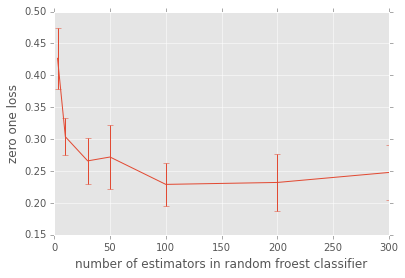

In [20]:
plt.errorbar(parameter, DFresult.T.mean(), yerr = DFresult.T.std())
plt.xlabel("number of estimators in random froest classifier")
plt.ylabel("zero one loss")
plt.savefig("random forester")